In [186]:
import pandas as pd
import numpy as np
import pickle
from ta.volatility import BollingerBands
import matplotlib.pyplot as plt
import os
import sys


from config import BASE_DIR
print(os.getcwd())
os.chdir(BASE_DIR)
print(BASE_DIR)
import scripts.functions as fn

from scripts.indicators import find_pivots,donchian

C:\Users\lbisa\Dropbox\Cripto\python\InvestingEvolution\ie\www
C:\Users\lbisa\Dropbox\Cripto\python\InvestingEvolution\ie\www


In [187]:
#klines_file =  './backtest/klines/2d01/Completo_BTCUSDT_2d01_2021-01-01_2023-07-31.DataFrame'
#klines_file = './backtest/klines/2d01/Lateral_BTCUSDT_2d01_2023-06-20_2023-10-09.DataFrame'
klines_file = './backtest/klines/1h01/Completo_BTCUSDT_1h01_2021-01-01_2023-07-31.DataFrame'
#klines_file = './backtest/klines/0m15/Completo_XRPUSDT_0m15_2021-01-01_2023-07-31.DataFrame'
#klines_file = './backtest/klines/0m01/Completo_BTCUSDT_0m01_2021-01-01_2023-07-31.DataFrame'

with open(klines_file, 'rb') as file:
    df = pickle.load(file)

start_date = klines_file.split('/')[4].split('_')[3] #Extrae la fecha de inicio
start_date = pd.to_datetime(start_date, format='%Y-%m-%d')
start_date = start_date.replace(hour=0, minute=0, second=0)



timeframe:  0 days 01:00:00
timeframe:  0 days 04:00:00


,datetime,open,high,low,close,volume,ma_5_r
75,2020-12-26 04:00:00,24909.80,24920.00,24745.41,24810.06,2386.010421,NaN
76,2020-12-26 05:00:00,24810.06,24843.44,24661.30,24708.87,2783.608727,NaN
77,2020-12-26 06:00:00,24708.87,24868.98,24652.54,24830.66,1689.135589,NaN
78,2020-12-26 07:00:00,24830.66,24933.00,24715.91,24784.48,1636.186578,NaN
79,2020-12-26 08:00:00,24784.48,25000.00,24754.16,24901.36,2493.019921,23786.758095
80,2020-12-26 09:00:00,24901.36,24914.81,24725.00,24859.36,2486.719327,23786.758095
81,2020-12-26 10:00:00,24859.36,24899.10,24562.50,24732.06,2725.819827,23786.758095
82,2020-12-26 11:00:00,24730.40,24887.17,24706.16,24834.36,2180.185237,23786.758095
83,2020-12-26 12:00:00,24834.36,24948.70,24734.94,24892.05,2312.462685,23878.342381
84,2020-12-26 13:00:00,24892.06,24987.34,24809.49,24942.42,2723.019112,23878.342381


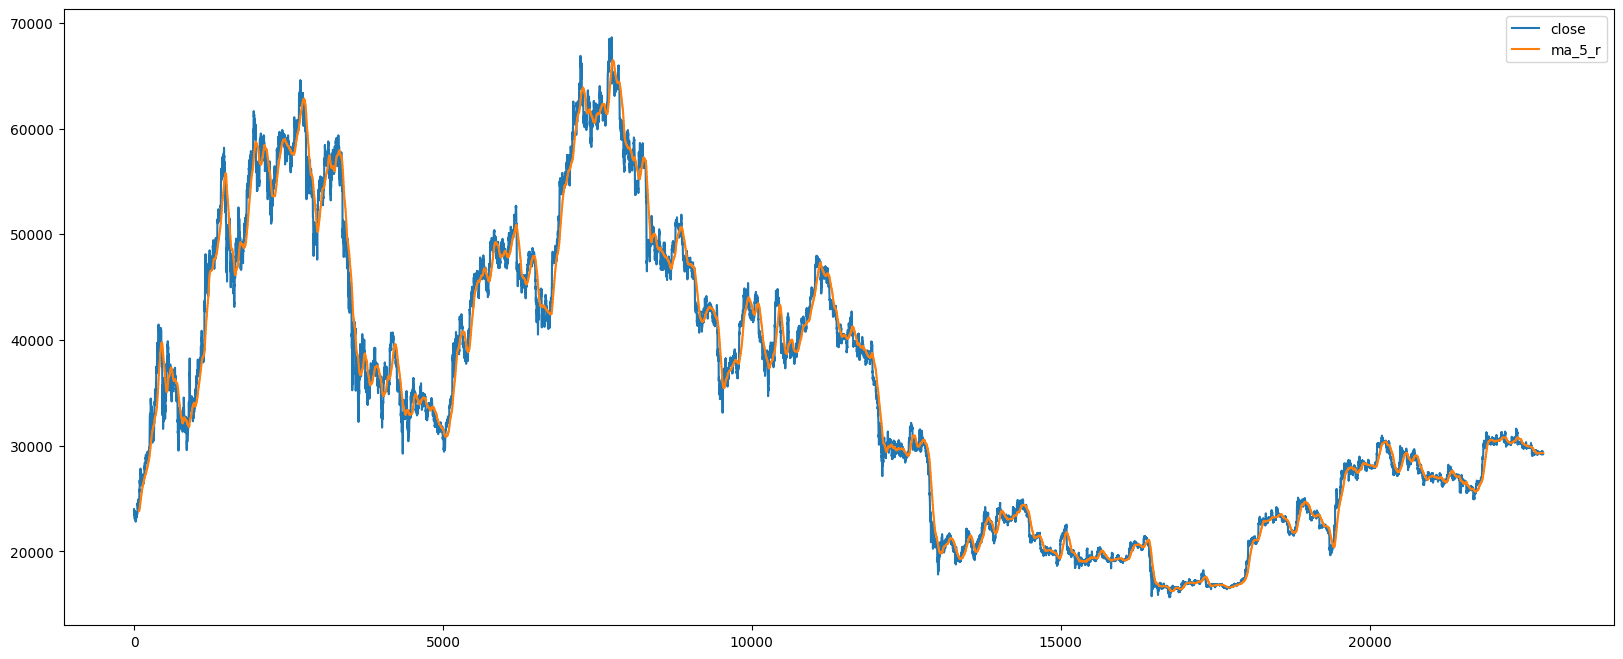

In [188]:
timeframe = df['datetime'].iloc[1]-df['datetime'].iloc[0]
print('timeframe: ',timeframe)
timeframe *= 4
print('timeframe: ',timeframe)
resample = timeframe
ma_period = 5

# Resamplear el dataframe a 1 dia
dfD = df.resample(resample, on="datetime").agg({
    'open': 'first',
    'high': 'max',
    'low': 'min',
    'close': 'last',
    'volume': 'sum'
})

# Calcular la media movil simple de 21 periodos
ma_col = f'ma_{ma_period}_r'

dfD[ma_col] = dfD['close'].rolling(window=21).mean()


# Asociar los valores de la media movil al dataframe original
df = pd.merge(df, dfD[ma_col],on='datetime',how='left')
df[ma_col] = df[ma_col].fillna(method='ffill')
df[['close',ma_col]].plot(figsize=(20,8))
df[75:100].head(50)
